Project 2 - Clustering

CS (STAT) 5525

# Instructions and Experiments

Note: Please read the entire project description before you begin. The goal of this project is to analyze the performance of clustering algorithms on several synthetic and real-world data sets. This will be done in the following steps:

* First, you will explore the data sets.
* Next, you will perform a series of experiments on which you will be asked to answer a series of questions. For these experiments, you will be running a python Jupyter notebook.
* Third, you will compile your answers in the form of a report.

# Python Jupyter Notebooks

We recommend installing Jupyter using Anaconda as it will also install other regularly used packages for scientific computing and data science. Some pointers to setup Jupyter notebooks on your system:

* Video link - https://www.youtube.com/watch?v=MvN7Wdh0Juk
* Medium Link - https://medium.com/@neuralnets/beginners-quick-guide-for-handlingissues-launching-jupyter-notebook-for-python-using-anaconda-8be3d57a209b
* Tutorials link - https://www.dataquest.io/blog/jupyter-notebook-tutorial/, https://www.youtube.com/watch?v=3C9E2yPBw7s


## Before you Begin
* Visually explore the data sets in the experiments below, and consider the following:
  * types of attributes
  * class distribution
  * which attributes appear to be good predictors, if any
  * possible correlation between attributes
  * any special structure that you might observe

  Note: The discussion of this exploration is not required in the report, but this step will help you get ready to answer the questions that follow

## Report and Submission
* Write a report addressing the experiment questions. Your project will be evaluated based only on what you write on the report. Submit the report as a PDF file on Canvas.
* Collect output from all your experiments and submit your Jupyter notebooks (cells displaying output) electronically as a separate zipped file on Canvas. We will look at your outputs if something is ambiguous in your report. Copy and paste the output from the Jupyter notebook into your report only to the limited extent needed to support your answers.

### Problem 1

The files for this problem are under Experiment 1 folder. Datasets to be used for experimentation: `2d data`, `chameleon`, `elliptical`, and `vertebrate`. Jupyter notebook: `cluster analysis.ipynb`. In this experiment, you will use different clustering techniques provided by the scikit-learn library package to answer the following questions:

1. On the movie ratings dataset, k-means clustering assign users to two clusters: cluster 0 has users with more affiinity for horror movies, and cluster 1 has users with more affinity for action movies. Given the cluster centroids, assign the following users to their respective cluster assignment:


| User   | Exorcist | Omen  | Star Wars  | Jaws  |
| ------ | -------- | ----- | ---------- | ----- |
| Paul   | 4        | 5     | 2          | 4     |
| Adel   | 1        | 2     | 3          | 4     |
| Kevin  | 2        | 3     | 5          | 5     |
| Jessi  | 1        | 1     | 3          | 2     |

In [17]:
import io
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cluster
import warnings
warnings.filterwarnings("ignore")

In [18]:
ratings = [['john',5,5,2,1],['mary',4,5,3,2],['bob',4,4,4,3],['lisa',2,2,4,5],['lee',1,2,3,4],['harry',2,1,5,5]]
titles = ['user','Jaws','Star Wars','Exorcist','Omen']
df = pd.DataFrame(ratings,columns=titles)

df = df.rename(columns=lambda x: x.strip())  
df = df.set_index('user')  
df

,Jaws,Star Wars,Exorcist,Omen
user,,,,
john,5,5,2,1
mary,4,5,3,2
bob,4,4,4,3
lisa,2,2,4,5
lee,1,2,3,4
harry,2,1,5,5


In [19]:
df.columns

Index(['Jaws', 'Star Wars', 'Exorcist', 'Omen'], dtype='object')

In [20]:
k_means = cluster.KMeans(n_clusters=2, max_iter=100, random_state=1)
k_means.fit(df)
labels = k_means.labels_
labels_df = pd.DataFrame(labels, index=df.index, columns=['Cluster ID'])

print(labels_df)

       Cluster ID
user             
john            1
mary            1
bob             1
lisa            0
lee             0
harry           0


2. To determine the optimal value of K in K-means, a common approach is to use the Elbow Method, where the idea is to find a K value that shows the sharpest change in slope of the SSE curve. For the movie rating dataset, what value of K would you arrive at by applying the Elbow Method visually? Briefly explain your reasoning.

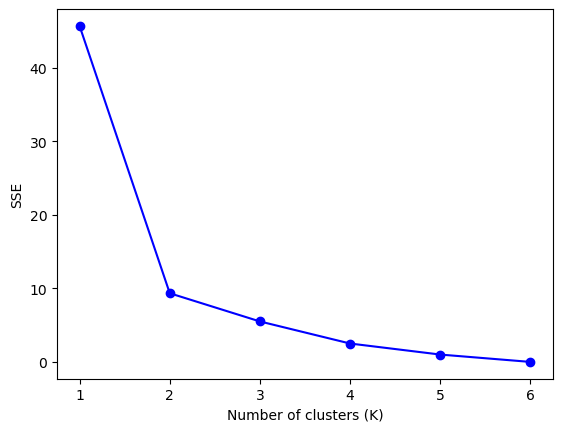

In [21]:
k_values = [1, 2, 3, 4, 5, 6]
sse_values = []
for k in k_values:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(df)
    sse_values.append(k_means.inertia_)
plt.plot(k_values, sse_values, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('SSE')

plt.show()

We chose k=3 clusters based on the elbow plot, which measures the distance between data points and assigned centroids in k-means clustering. As k increases, SSE decreases until a point of diminishing returns is reached where adding more clusters doesn't improve clustering quality significantly.

3. On the Vertebrate dataset, we illustrate the results of using three hierarchical clustering algorithms (1) single link (MIN), (2) complete link (MAX), and (3) group average. Given the class label in the original dataset, compute the cophenetic correlation coefficient of the clustering produced by each algorithm. Which clustering algorithm shows the best match with the class labels?

In [22]:
df=df = pd.read_csv('Experiment1/dataset/vertebrate.csv')
df.columns
import numpy as np
from scipy.spatial.distance import pdist

from scipy.cluster import hierarchy
data = pd.read_csv('Experiment1/Dataset/vertebrate.csv',header='infer')
names = data['Name']
Y = data['Class']
X = data.drop(['Name','Class'],axis=1)
Yarr = pd.factorize(Y)[0].reshape(-1,1)
Ydist = pdist(Yarr,metric='hamming'); 
Z = hierarchy.linkage(X.to_numpy(), 'single')
c, Zdist = hierarchy.cophenet(Z,Ydist)
print ("single link",c)
Z = hierarchy.linkage(X.to_numpy(), 'complete')
c, Zdist = hierarchy.cophenet(Z,Ydist)
print("\n complete link",c)

Z = hierarchy.linkage(X.to_numpy(), 'average')
c, Zdist = hierarchy.cophenet(Z,Ydist)

print ("\n group average",c)

single link 0.35580411323343614

 complete link 0.6063706366458652

 group average 0.4886522572675798


4. On the chameleon dataset, how many clusters are produced by DBSCAN when the minimum number of points (min samples) is set to 1, 2, 3, 4, and 5, respectively, while neighborhood radius (eps) is set to a constant value of 15.5. For each instance, copy and paste the plot of the clusters.

In [23]:
df = pd.read_csv('Experiment1/Dataset/chameleon.data',delimiter=' ', names = ['x','y']) 
df

,x,y
0,650.914,214.888
1,41.767,179.408
2,509.126,233.749
3,486.403,152.427
4,46.883,367.904
...,...,...
1966,631.430,210.478
1967,187.652,247.923
1968,124.996,264.847
1969,522.511,302.785


<AxesSubplot: xlabel='x', ylabel='y'>

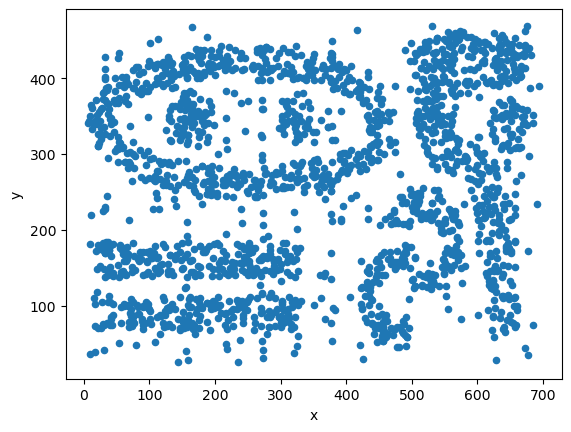

In [24]:
df.plot.scatter(x='x',y='y')

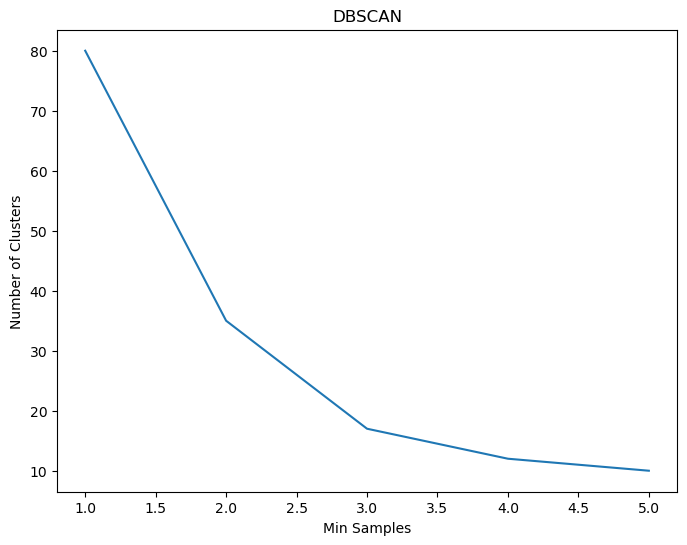

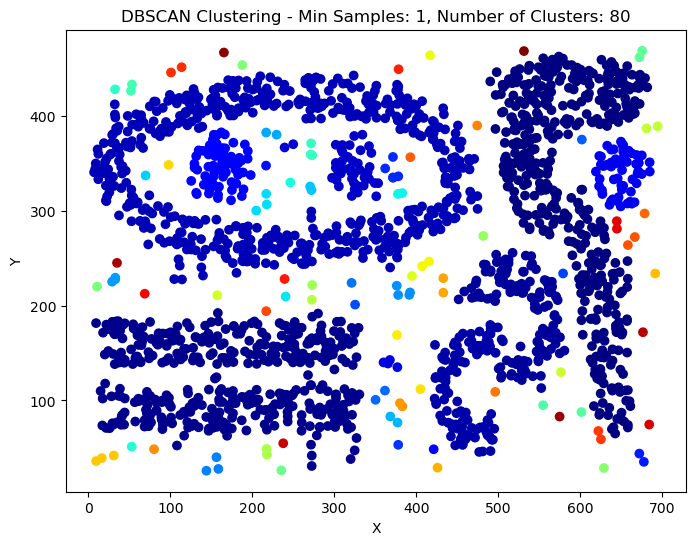

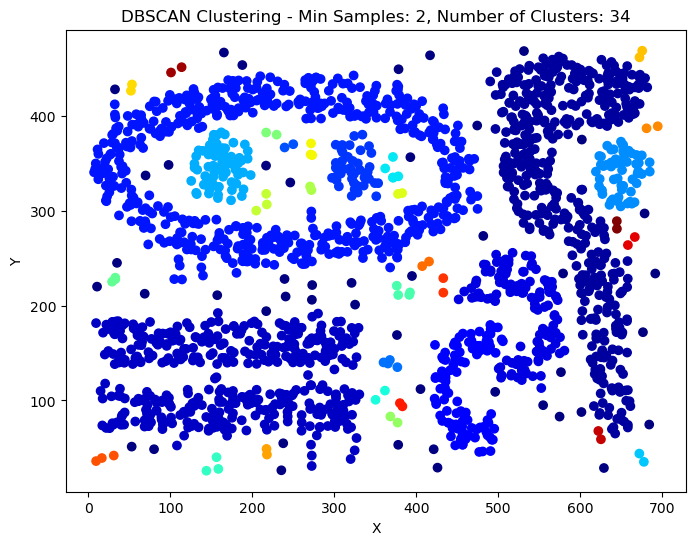

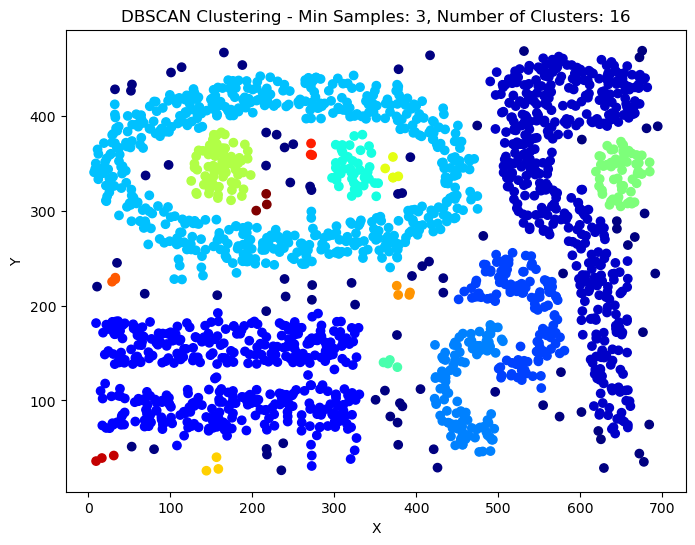

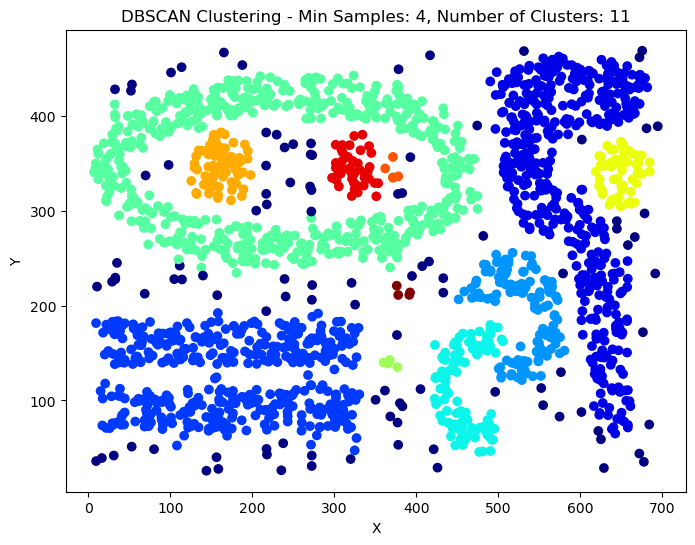

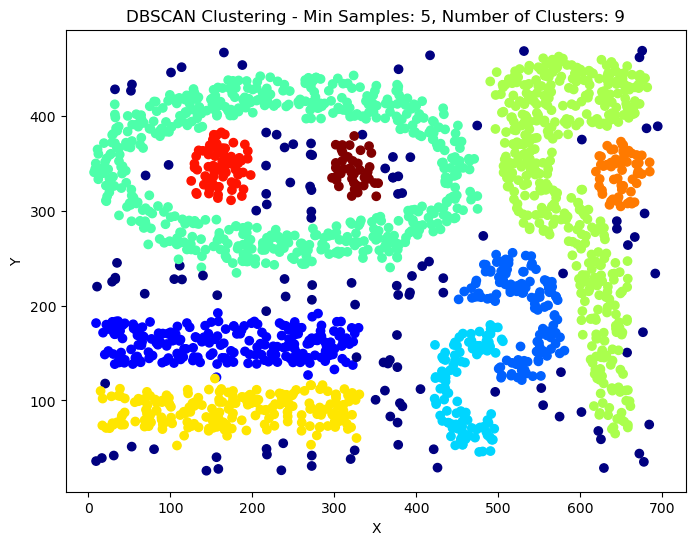

In [25]:
from sklearn.cluster import DBSCAN
cluster_counts = {i: len(np.unique(DBSCAN(eps=15.5, min_samples=i).fit(df).labels_))
                  for i in range(1, 6)}


plt.figure(figsize=(8, 6))
plt.plot(cluster_counts.keys(), cluster_counts.values())
plt.xlabel("Min Samples")
plt.ylabel("Number of Clusters")
plt.title("DBSCAN")
plt.show()

for i in range(1, 6):
    db = DBSCAN(eps=15.5, min_samples=i).fit(df)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = pd.DataFrame(db.labels_, columns=['Cluster ID'])
    result = pd.concat((df, labels), axis=1)
    n_clusters = labels.max()[0] + 1
    plt.figure(figsize=(8, 6))
    plt.scatter(x='x', y='y', c='Cluster ID', cmap='jet', data=result)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'DBSCAN Clustering - Min Samples: {i}, Number of Clusters: {n_clusters}')
    plt.show()

5. For elliptical and 2D data, we applied k-means with k = 2. What happens if we use k = 10 for both these datasets? Copy and paste the clusters formed.

Number of clusters in data 1: 9
Number of clusters data 2: 9


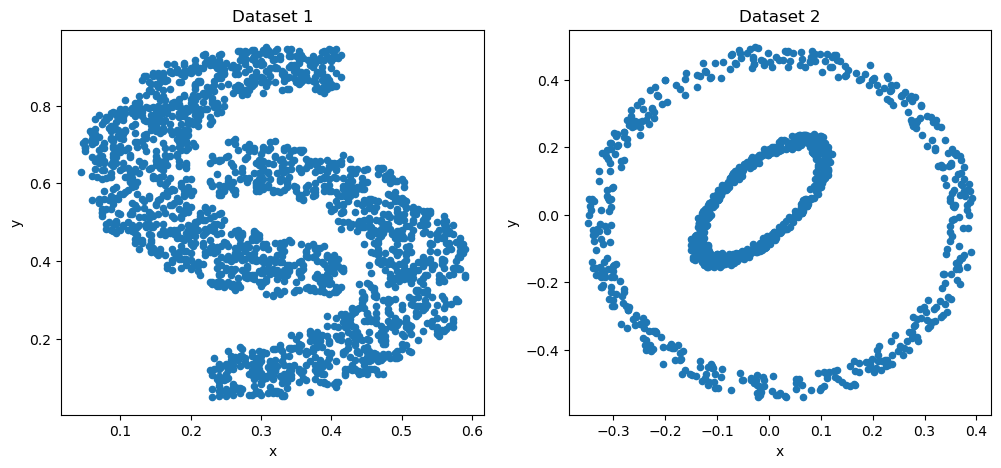

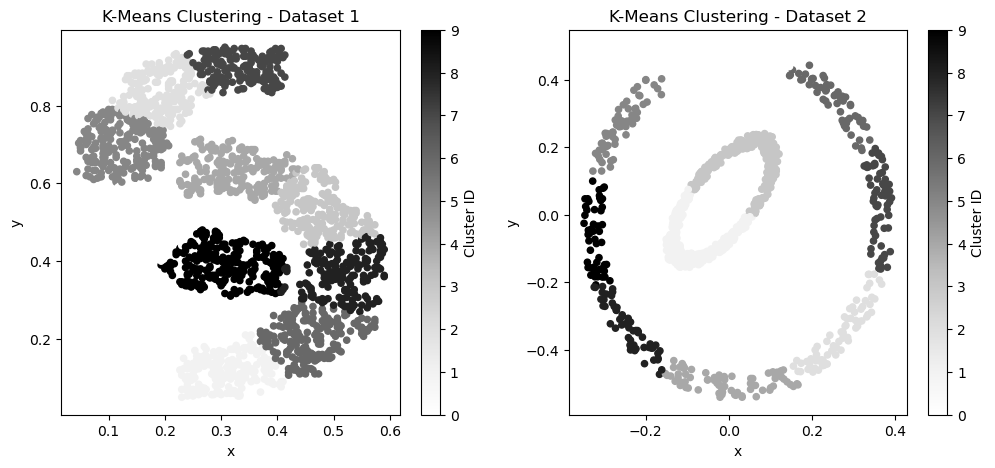

In [26]:
from sklearn.cluster import KMeans
data1 = pd.read_csv('Experiment1/Dataset/2d_data.txt', delimiter=' ', names=['x', 'y'])
data2 = pd.read_csv('Experiment1/Dataset/elliptical.txt', delimiter=' ', names=['x', 'y'])


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

data1.plot.scatter(x='x', y='y', ax=axes[0])
axes[0].set_title('Dataset 1')

data2.plot.scatter(x='x', y='y', ax=axes[1])
axes[1].set_title('Dataset 2')


kmeans = KMeans(n_clusters=10, max_iter=50, random_state=1)

kmeans.fit(data1)
labels1 = pd.DataFrame(kmeans.labels_, columns=['Cluster ID'])
result1 = pd.concat((data1, labels1), axis=1)

kmeans.fit(data2)
labels2 = pd.DataFrame(kmeans.labels_, columns=['Cluster ID'])
result2 = pd.concat((data2, labels2), axis=1)


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

result1.plot.scatter(x='x', y='y', c='Cluster ID', ax=axes[0])
axes[0].set_title('K-Means Clustering - Dataset 1')

result2.plot.scatter(x='x', y='y', c='Cluster ID',  ax=axes[1])
axes[1].set_title('K-Means Clustering - Dataset 2')


print(f"Number of clusters in data 1: {labels1.max()[0]}")
print(f"Number of clusters data 2: {labels2.max()[0]}")

### Problem 2

The files for this problem are under Experiment 2 folder. Datasets to be used for experimentation are : `samsung test labels`, `samsung train labels`, `samsung train`, `samsung test`. Jupyter notebook: `pca and clustering.ipynb`. The data comes from the accelerometers and gyros of Samsung Galaxy S3 mobile phones (https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones).


In this data, the type of activity a person was performing with a phone in their pocket is also known - whether they were walking, standing, lying down, sitting, walking up or walking down the stairs. Answer the following questions:
1. Let us look at the correspondence between the cluster labels and the original activity class labels. We see that each cluster has points coming from multiple classes, and is thus impure. Let's look at the maximum percentage of points in a cluster that are coming from a single class, which we can call as the 'purity' metric. For example, if a cluster consisting of 300 points has the following distribution of class labels:

* class 1 - 200
* class 3 - 50
* class 6 - 50

then the purity metric for this cluster will be 200/300, which is approximately 0.67. A higher value of this metric for a cluster signifies higher purity of the cluster. Compute this metric for all of the 6 clusters produced by running Kmeans with K = 6 on the given dataset. What is the maximum purity metric across all 6 clusters?

In [29]:
import os
from sklearn.preprocessing import StandardScaler




X_train = np.loadtxt(os.path.join("Experiment2/", "samsung/", "samsung_train.txt"))
y_train = np.loadtxt(os.path.join("Experiment2", "samsung/", "samsung_train_labels.txt")).astype(int)

X_test = np.loadtxt(os.path.join("Experiment2/", "samsung/", "samsung_test.txt"))
y_test = np.loadtxt(os.path.join("Experiment2/", "samsung/", "samsung_test_labels.txt")).astype(int)

X = np.vstack([X_train, X_test])
y = np.hstack([y_train, y_test])
n_classes = np.unique(y).size
print(f"Number of classes are {n_classes}")


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


k = 6
kmeans = KMeans(n_clusters=k, n_init=100, random_state=1)
kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_


tab = pd.crosstab(y, cluster_labels, margins=True)
tab.index = ['walking', 'going up the stairs', 'going down the stairs', 'sitting', 'standing', 'lying', 'all']
tab.columns = ['cluster' + str(i + 1) for i in range(k)] + ['all']
tab = tab.drop(['all'])
purity = round(max(tab.max() / tab.sum()), 3)

print(f"maximum purity metric is {purity} with k = {k}")


Number of classes are 6
maximum purity metric is 0.945 with k = 6


2. What is the maximum purity metric for any cluster if we run Kmeans with K = 10 on the same dataset? Explain the rise/fall in purity as we increase K from 6 to 10.

The maximum purity metric for any cluster is 0.959 with k = 8
The purity scores for k = 6 to 10 are: [0.945, 0.946, 0.959, 0.959, 0.958]


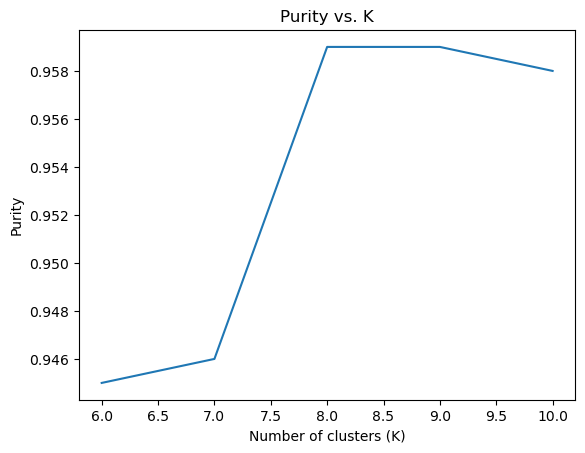

In [30]:
X_train = np.loadtxt(os.path.join("Experiment2", "samsung", "samsung_train.txt"))
y_train = np.loadtxt(os.path.join("Experiment2", "samsung", "samsung_train_labels.txt")).astype(int)
X_test = np.loadtxt(os.path.join("Experiment2", "samsung", "samsung_test.txt"))
y_test = np.loadtxt(os.path.join("Experiment2", "samsung", "samsung_test_labels.txt")).astype(int)
X = np.vstack([X_train, X_test])
y = np.hstack([y_train, y_test])
n_classes = np.unique(y).size

# standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# calculate purity for k = 6 to 10
purity_scores = []
for k in range(6, 11):
    kmeans = KMeans(n_clusters=k, n_init=100, random_state=1)
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.labels_
    tab = pd.crosstab(y, cluster_labels, margins=True)
    tab.index = ['walking', 'going up the stairs', 'going down the stairs', 'sitting', 'standing', 'lying', 'all']
    tab.columns = ['cluster' + str(i + 1) for i in range(k)] + ['all']
    tab = tab.drop(['all'])
    purity = max(tab.max() / tab.sum())
    purity_scores.append(round(purity, 3))

# print maximum purity score and purity scores for each k
max_purity = max(purity_scores)
print(f"The maximum purity metric for any cluster is {max_purity} with k = {purity_scores.index(max_purity) + 6}")
print(f"The purity scores for k = 6 to 10 are: {purity_scores}")

# plot purity scores vs. k
pd.Series(purity_scores, index=range(6, 11)).plot()
plt.xlabel("Number of clusters (K)")
plt.ylabel("Purity")
plt.title("Purity vs. K")
plt.show()

the purity incereses as the data gets divided further into smaller clusters, but at higher cluster numbers we have more and more outliers which lead to the drop 

### Problem 3

The files for this problem are under Experiment 3 folder. Jupyter notebook: `covid-19research-challenge.ipynb`. In this experiment, we will be looking at the problem of clustering real-world research articles related to COVID-19. Dataset Download URL: https:// drive.google.com/file/d/1IC0s9QoBLWFN9tRI-z2QbJJWgngfAm8w/view?usp=sharing (Filename: CORD-19-research-challenge.zip, File size: 1.58 GB). Please download and unzip this file in the Experiment 3 folder before running the Python notebook for this problem. Dataset Description: In response to the COVID-19 pandemic, the White House and a coalition of leading research groups have prepared the COVID-19 Open Research Dataset (CORD-19). CORD-19 is a resource of over 29,000 scholarly articles, including over 13,000 with full text, about COVID-19, SARS-CoV-2, and related coronaviruses. This freely available dataset is provided to the global research community to apply recent advances in natural language processing and other AI techniques to generate new insights in support of the ongoing fight against this infectious disease. There is a growing urgency for these approaches because of the rapid acceleration in modern coronavirus literature, making it difficult for the medical research community to keep up. Answer the following questions.

1. After handling duplicates, what is the count, mean, standard deviation minimum, and maximum values for the abstract word count and body word count?

In [31]:
df_covid=pd.read_csv('Experiment3/final_processed_metadata')

df_covid = df_covid[df_covid.abstract != ''] #Remove rows which are missing abstracts
df_covid = df_covid[df_covid.body_text != ''] #Remove rows which are missing body_text
df_covid.drop_duplicates(['abstract', 'body_text'], inplace=True) # remove duplicate rows having same abstract and body_text
df_covid.describe(include='all')
df=df_covid
data=df_covid
df.describe(include='all')

,paper_id,abstract,body_text,authors,title,journal,abstract_summary,abstract_word_count,body_word_count
count,24584,24583,24584,24584,24584,24584,24584,24584.000000,24584.000000
unique,24584,24547,24584,23709,24545,3963,24545,NaN,NaN
top,00142f93c18b07350be89e96372d240372437ed9,travel medicine and infectious disease xxx xxx...,introduction human beings are constantly expos...,"Woo, Patrick C. Y.. Lau, Susanna K. P....",Respiratory Infections,PLoS One,Travel Medicine and Infectious Disease xxx<br...,NaN,NaN
freq,1,5,1,7,3,1514,5,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,216.446673,4435.475106
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137.065117,3657.421423
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,23.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,147.000000,2711.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.000000,3809.500000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,255.000000,5431.000000


In [32]:
column_labels = df.columns
column_labels

Index(['paper_id', 'abstract', 'body_text', 'authors', 'title', 'journal',
       'abstract_summary', 'abstract_word_count', 'body_word_count'],
      dtype='object')

2. Given the following word list: ['the', '2019', 'novel', 'coronavirus', 'sarscov2', 'identified', 'as', 'the', 'cause'], what is its corresponding list of 2-grams ?

In [33]:
import numpy as np
words = ["the", "2019", "novel", "coronavirus","sarscov2","identified", "as", "the", "cause"]
n_gram_all = []
# get n-grams for the instance
n_gram = []
for i in range(len(words)-2+1):
    n_gram.append("".join(words[i:i+2]))
n_gram_all.append(n_gram)
n_gram_all

[['the2019',
  '2019novel',
  'novelcoronavirus',
  'coronavirussarscov2',
  'sarscov2identified',
  'identifiedas',
  'asthe',
  'thecause']]

3. When we applied k-means clustering with K = 10 on the data created using HashingVectorizer features from 2-grams, we could see that some clusters still had some overlap in the t-SNE plot. Can you improve this by changing the number of clusters? What value of K visually leads to good separation among the clusters in the t-SNE plot? Copy and paste the corresponding t-SNE plot.

use eucludian distance to find the best value between points for k and check using silouthee score 

In [34]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import seaborn as sns

# create a list to store the Silhouette scores for each value of k
silhouette_scores = []

# loop over different values of k
for k in range(8, 13):
    # create a MiniBatchKMeans object with k clusters
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    # fit the algorithm to the data
    kmeans.fit(X)
    # calculate the Silhouette score and append it to the list
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# find the value of k with the highest Silhouette score
best_k = silhouette_scores.index(max(silhouette_scores)) + 8
best_k

11

t-SNE Covid-19 Articles - Clustered k=10

![alt text](Experiment3/tsneclusteredk10.png)




t-SNE Covid-19 Articles - Clustered k=9


![tsne clustered k = 9 best](Experiment3/tsne%20clustered%20k=%209.png)


t-SNE Covid-19 Articles - Clustered k=11

![Tsne clustered k = 11 best](Experiment3/Tsne%20clustered%20k%20%3D%2011%20best.png)



From the code we find the best value of k is k=11 and the second best is k=9 as we can see from the plots k=11 is the best as it has lower overlaps compared to k= 10 and k=11.  

the code below was used to plot these clusters in the covid-19research-challenge.ipynb 

In [ ]:
from sklearn.cluster import MiniBatchKMeans

k = 9
kmeans = MiniBatchKMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)
# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", len(set(y_pred)))

# plot
sns.scatterplot(data = X_embedded, x = X_embedded[:,0],y = X_embedded[:,1], hue=y_pred, legend='full', palette=palette)
plt.title("t-SNE Covid-19 Articles - Clustered")
# plt.savefig("plots/t-sne_covid19_label.png")
plt.show()

4. By using tf-idf vectorizer and plain text features instead of 2-grams, we could see that the clusters obtained from K-means clustering (with K = 10) are more separable in the t-SNE plot. What happens when we apply the tf-idf vectorizer on the 2-gram representation of documents instead of plain text, and then apply K-means clustering with K = 10? Copy and paste the corresponding t-SNE plot.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(lowercase=False,analyzer=lambda l:l, max_features=2**12)
X = vectorizer.fit_transform(n_gram_all)
from sklearn.cluster import MiniBatchKMeans

k = 10
kmeans = MiniBatchKMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)
from sklearn.manifold import TSNE

tsne = TSNE(verbose=1)
X_embedded = tsne.fit_transform(X.toarray())
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", len(set(y)))

# plot
sns.scatterplot(data= X_embedded, x= X_embedded[:,0],y = X_embedded[:,1], hue=y_pred, legend='full', palette=palette)
plt.title("t-SNE Covid-19 Articles - Clustered(K-Means) - Tf-idf with 2-grams")
# plt.savefig("plots/t-sne_covid19_label_TFID.png")
plt.show()

output for tf-idf vectorizer with plain text features

![alt text](Experiment3/tidfplaintextfeatures.png)



output for 2-grams tf-idf vectorizer.

![alt text](Experiment3/2gramq4oupt.png)



we see output for tf-idf vectorizer with plain text features has a better seperation